In [66]:
import pandas as pd

In [67]:
agri_train=pd.read_csv('agricultural_yield_train.csv')

In [68]:
agri_train.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,96.415657,1,147.853040,94.593926,444.267569,3,683.759119
1,92.352626,0,281.565396,90.504644,517.585491,7,678.714861
2,63.714785,1,137.864940,97.329340,420.310945,8,934.691975
3,90.084256,1,100.946659,113.404828,547.817646,7,905.842541
4,81.600341,1,223.088908,83.048176,434.726333,6,897.584665


In [69]:
agri_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Soil_Quality                      16000 non-null  float64
 1   Seed_Variety                      16000 non-null  int64  
 2   Fertilizer_Amount_kg_per_hectare  16000 non-null  float64
 3   Sunny_Days                        16000 non-null  float64
 4   Rainfall_mm                       16000 non-null  float64
 5   Irrigation_Schedule               16000 non-null  int64  
 6   Yield_kg_per_hectare              16000 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 875.1 KB


In [70]:
agri_train.describe()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,74.759340,0.702000,175.179275,99.927792,500.527248,5.033313,713.999725
std,14.529295,0.457394,71.971900,9.980610,100.062422,2.229689,202.210914
min,50.007519,0.000000,50.049204,51.478823,109.997455,0.000000,57.514891
25%,62.165317,0.000000,112.434736,93.176143,433.369759,3.000000,577.059891
50%,74.675052,1.000000,175.740993,99.969540,499.955259,5.000000,729.421176
75%,87.376167,1.000000,237.621854,106.685691,567.292539,6.000000,857.442893
max,99.998101,1.000000,299.987645,142.417719,872.349673,15.000000,1385.113600


In [71]:
agri_test=pd.read_csv('agricultural_yield_test.csv')

# visualization

In [72]:
import matplotlib.pyplot as plt


<Axes: xlabel='Soil_Quality', ylabel='Yield_kg_per_hectare'>

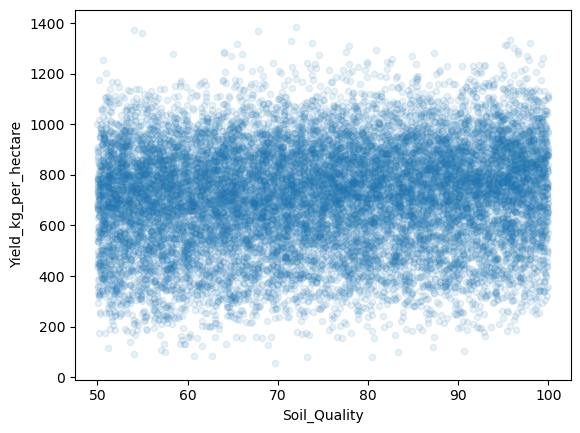

In [73]:
agri_train.plot(kind="scatter",x="Soil_Quality",y="Yield_kg_per_hectare",alpha=0.1)

<Axes: xlabel='Seed_Variety', ylabel='Yield_kg_per_hectare'>

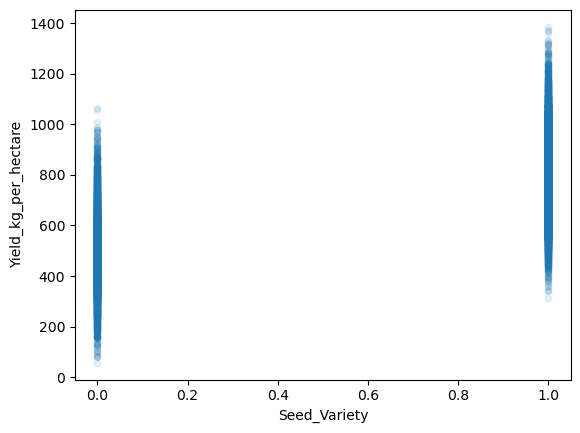

In [74]:
agri_train.plot(kind="scatter",x="Seed_Variety",y="Yield_kg_per_hectare",alpha=0.1)

<Axes: xlabel='Fertilizer_Amount_kg_per_hectare', ylabel='Yield_kg_per_hectare'>

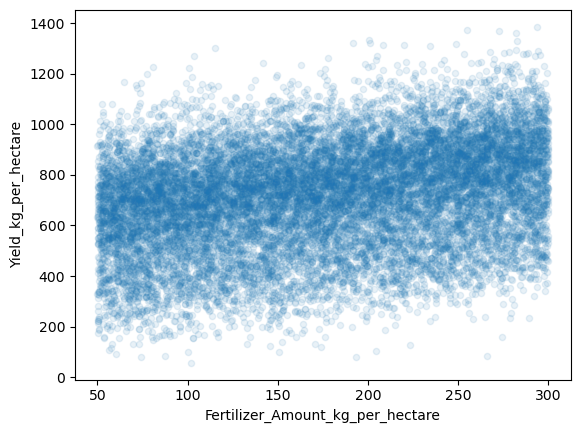

In [75]:
agri_train.plot(kind="scatter",x="Fertilizer_Amount_kg_per_hectare",y="Yield_kg_per_hectare",alpha=0.1)

<Axes: xlabel='Sunny_Days', ylabel='Yield_kg_per_hectare'>

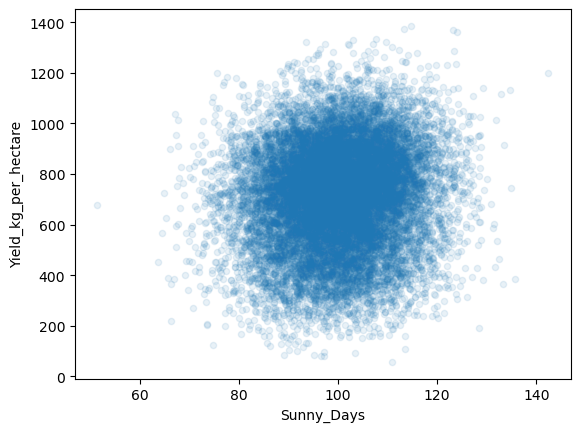

In [76]:
agri_train.plot(kind="scatter",x="Sunny_Days",y="Yield_kg_per_hectare",alpha=0.1)

<Axes: xlabel='Rainfall_mm', ylabel='Yield_kg_per_hectare'>

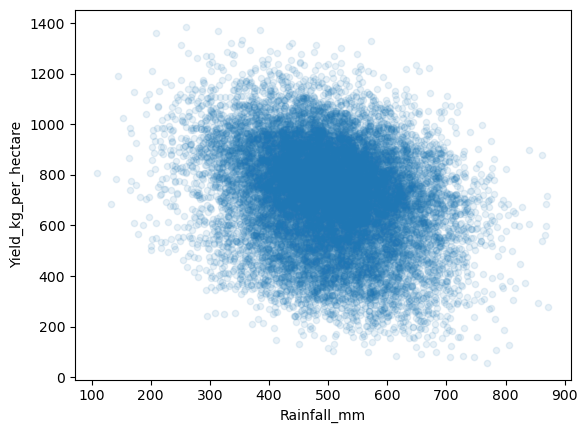

In [77]:
agri_train.plot(kind="scatter",x="Rainfall_mm",y="Yield_kg_per_hectare",alpha=0.1)

<Axes: xlabel='Irrigation_Schedule', ylabel='Yield_kg_per_hectare'>

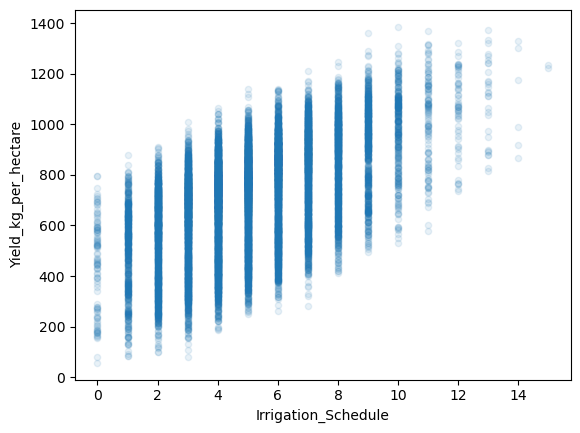

In [78]:
agri_train.plot(kind="scatter",x="Irrigation_Schedule",y="Yield_kg_per_hectare",alpha=0.1)

# looking for corelations

In [79]:
corr_matrix=agri_train.corr()

In [80]:
corr_matrix["Yield_kg_per_hectare"].sort_values(ascending=False)

Yield_kg_per_hectare                1.000000
Seed_Variety                        0.680197
Irrigation_Schedule                 0.561456
Fertilizer_Amount_kg_per_hectare    0.284841
Soil_Quality                        0.109346
Sunny_Days                          0.099349
Rainfall_mm                        -0.252165
Name: Yield_kg_per_hectare, dtype: float64

In [81]:
agri_train['Seed_Variety'].count()

16000

# data cleaning 

In [82]:
agri_train.isnull().sum()

Soil_Quality                        0
Seed_Variety                        0
Fertilizer_Amount_kg_per_hectare    0
Sunny_Days                          0
Rainfall_mm                         0
Irrigation_Schedule                 0
Yield_kg_per_hectare                0
dtype: int64

In [83]:
from sklearn.linear_model import LinearRegression

x = agri_train[["Soil_Quality", "Seed_Variety", "Fertilizer_Amount_kg_per_hectare","Sunny_Days","Rainfall_mm","Irrigation_Schedule"]]
y = agri_train["Yield_kg_per_hectare"]


lin_reg = LinearRegression()
lin_reg.fit(x, y)


LinearRegression()

In [84]:
# validation

In [86]:
from sklearn.metrics import mean_squared_error
import numpy as np
agri_test_labels=agri_test["Yield_kg_per_hectare"]
predictions= lin_reg.predict(agri_test[["Soil_Quality", "Seed_Variety", "Fertilizer_Amount_kg_per_hectare","Sunny_Days","Rainfall_mm","Irrigation_Schedule"]])
lin_mse = mean_squared_error(agri_test_labels,predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse



50.62646837659608

In [90]:

x = agri_train[["Soil_Quality", "Seed_Variety", "Fertilizer_Amount_kg_per_hectare","Sunny_Days","Rainfall_mm","Irrigation_Schedule"]]
y = agri_train["Yield_kg_per_hectare"]




In [91]:
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor()

tree_reg.fit(x, y)


DecisionTreeRegressor()

In [92]:
from sklearn.metrics import mean_squared_error
import numpy as np
agri_test_labels=agri_test["Yield_kg_per_hectare"]
predictions= tree_reg.predict(agri_test[["Soil_Quality", "Seed_Variety", "Fertilizer_Amount_kg_per_hectare","Sunny_Days","Rainfall_mm","Irrigation_Schedule"]])
tree_mse = mean_squared_error(agri_test_labels,predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse



76.42103318670999

In [ ]:
# cross validation


In [93]:
import joblib
my_model=lin_reg
joblib.dump(my_model, "my_model_linear.pkl")

['my_model_linear.pkl']

In [94]:
import joblib
my_model=tree_reg
joblib.dump(my_model, "my_model_tree.pkl")

['my_model_tree.pkl']

In [95]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x,y)

RandomForestRegressor()

In [96]:
from sklearn.metrics import mean_squared_error
import numpy as np
agri_test_labels=agri_test["Yield_kg_per_hectare"]
predictions= forest_reg.predict(agri_test[["Soil_Quality", "Seed_Variety", "Fertilizer_Amount_kg_per_hectare","Sunny_Days","Rainfall_mm","Irrigation_Schedule"]])
random_mse = mean_squared_error(agri_test_labels,predictions)
random_rmse = np.sqrt(random_mse)
random_rmse



54.820916406392385

In [ ]:
# linear> radom forest> decisioin tree

In [97]:
import joblib
my_model=forest_reg
joblib.dump(my_model, "my_model_forest.pkl")

['my_model_forest.pkl']